In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [12]:
data= pd.read_csv(r'C:\Users\excel\OneDrive\Desktop\regr1.txt',sep=' ',header=None,names=['f','t'])

In [13]:
data

,f,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568
...,...,...
85,0.95,1.98410
86,0.96,2.00660
87,0.97,2.04930
88,0.98,2.05030


In [42]:
f= data['f'].values
t=data['t'].values
tsq=t*t

In [43]:
f

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99])

In [19]:
t.shape

(90,)

In [18]:
## initialize the m & c
m,c=0,0

In [32]:
def train(x,y,m,c,eta):
    const= -2/len(y)
    y_cal= m*x+c
    delta_m= const*sum(x*(y-y_cal))
    delta_c= const*sum(y-y_cal)
    m=m-eta*delta_m
    c=c-eta*delta_c
    error= sum((y-y_cal)**2)/len(y)
    return m,c,error
    
def train_on_all(x,y,m,c,eta,iterations=1000):
    for step in range(iterations):
        m,c,err= train(x,y,m,c,eta)
    return m,c,err
    

In [33]:
lr=0.01

C:\Users\excel\AppData\Local\Temp\ipykernel_14916\1934223761.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


m=3.53904 c=0.419701 Error=0.0319305
m=3.59792 c=0.385873 Error=0.027308
m=3.65105 c=0.35535 Error=0.0235449
m=3.69898 c=0.327811 Error=0.0204815
m=3.74223 c=0.302963 Error=0.0179876
m=3.78125 c=0.280544 Error=0.0159573
m=3.81646 c=0.260316 Error=0.0143046
m=3.84823 c=0.242065 Error=0.0129591
m=3.87689 c=0.225598 Error=0.0118638
m=3.90275 c=0.21074 Error=0.0109721


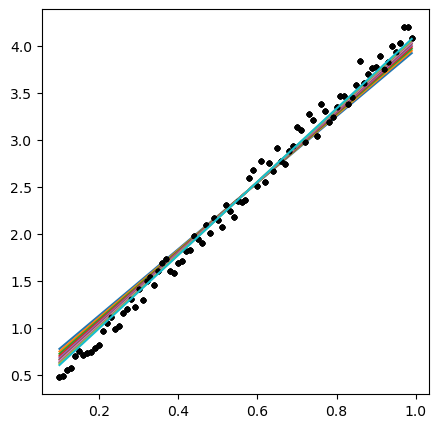

In [47]:
fig= plt.figure(figsize=(5,5))
ax= fig.add_subplot(1,1,1)
plt.ion()
fig.show()
fig.canvas.draw()
for number in range(10):
    m,c,err= train_on_all(f,tsq,m,c,lr,iterations=100)
    print('m={0:.6} c={1:.6} Error={2:.6}'.format(m,c,err))
    y= m*f +c
    ax.plot(f,tsq,'.k')
    ax.plot(f,y)
    fig.canvas.draw()
    time.sleep(1)
    